In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
from jax import jit
import jaxquantum as jqt 
import jax.numpy as jnp
import matplotlib.pyplot as plt

### Lossy Harmonic Oscillator

100% |██████████| [00:01<00:00, 93.89%/s] 


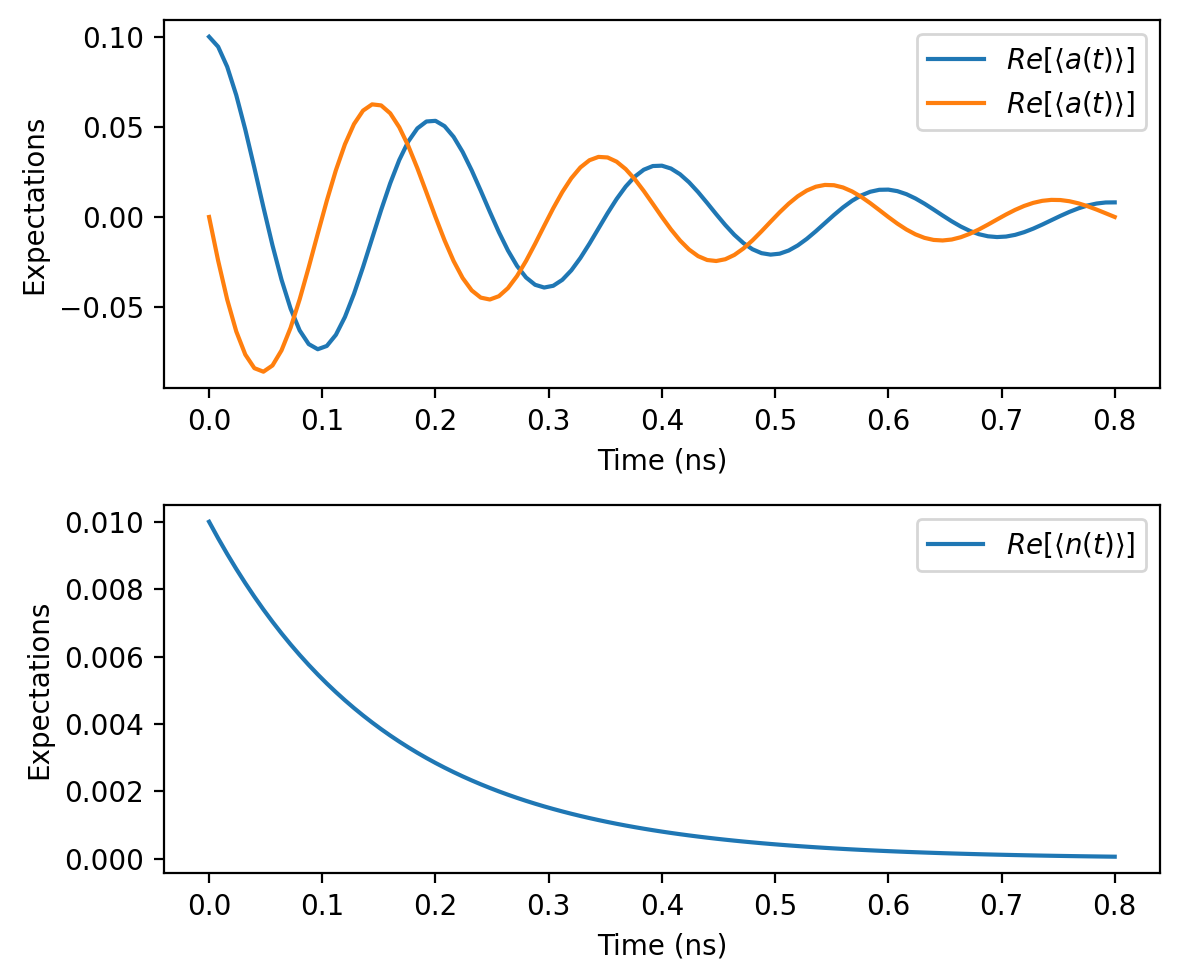

In [14]:
N = 100

omega_a = 2.0*jnp.pi*5.0
kappa = 2*jnp.pi*1
initial_state = jqt.displace(N, 0.1) @ jqt.basis(N,0)
initial_state_dm = initial_state.to_dm()
ts = jnp.linspace(0, 4*2*jnp.pi/omega_a, 101)

a = jqt.destroy(N)
n = a.dag() @ a

c_ops = [a*jnp.sqrt(kappa)]

@jit
def Ht(t):
    H0 = omega_a*n
    return H0

solver_options = jqt.SolverOptions.create(progress_meter=True)
states = jqt.mesolve(initial_state_dm, ts, c_ops=c_ops, Ht=Ht, solver_options=solver_options) 
nt = jnp.real(jqt.calc_expect(n, states))
a_real = jnp.real(jqt.calc_expect(a, states))
a_imag = jnp.imag(jqt.calc_expect(a, states))

fig, axs = plt.subplots(2,1, dpi=200, figsize=(6,5))
ax = axs[0]
ax.plot(ts, a_real, label=r"$Re[\langle a(t)\rangle]$")
ax.plot(ts, a_imag, label=r"$Re[\langle a(t)\rangle]$")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectations")
ax.legend()

ax = axs[1]
ax.plot(ts, nt, label=r"$Re[\langle n(t)\rangle]$")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectations")
ax.legend()
fig.tight_layout()

### Sideband cooling qubit

In [ ]:
# N = 100

# omega_a = 2.0*jnp.pi*5.0
# g = 2*jnp.pi*0.1
# kappa = 2*jnp.pi*1

# initial_state = jqt.displace(N, 0.1) @ jqt.basis(N,0)
# initial_state_dm = initial_state.to_dm()
# ts = jnp.linspace(0, 4*2*jnp.pi/omega_a, 101)

# a = jqt.destroy(N)
# n = a.dag() @ a

# c_ops = [a*jnp.sqrt(kappa)]

# @jit
# def Ht(t):
#     H0 = omega_a*n
#     return H0

# solver_options = jqt.SolverOptions.create(progress_meter=True)
# states = jqt.mesolve(initial_state_dm, ts, c_ops=c_ops, Ht=Ht, solver_options=solver_options) 
# nt = jnp.real(jqt.calc_expect(n, states))
# a_real = jnp.real(jqt.calc_expect(a, states))
# a_imag = jnp.imag(jqt.calc_expect(a, states))

# fig, axs = plt.subplots(2,1, dpi=200, figsize=(6,5))
# ax = axs[0]
# ax.plot(ts, a_real, label=r"$Re[\langle a(t)\rangle]$")
# ax.plot(ts, a_imag, label=r"$Re[\langle a(t)\rangle]$")
# ax.set_xlabel("Time (ns)")
# ax.set_ylabel("Expectations")
# ax.legend()

# ax = axs[1]
# ax.plot(ts, nt, label=r"$Re[\langle n(t)\rangle]$")
# ax.set_xlabel("Time (ns)")
# ax.set_ylabel("Expectations")
# ax.legend()
# fig.tight_layout()